C:/Users/mille/Desktop/Data_cleaning/WELLCOME_APCspend2013_forThinkful.csv

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

import chardet
import codecs


from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

Cleaning the data I first started by using with open statement. 

In [155]:
with open('/Users/mille/Desktop/Data_cleaning/WELLCOME_APCspend2013_forThinkful.csv', 'rb') as f:
    contents = f.read()
f

<_io.BufferedReader name='/Users/mille/Desktop/Data_cleaning/WELLCOME_APCspend2013_forThinkful.csv'>

In [156]:
# look at the first ten thousand bytes to guess the character encoding
with open("/Users/mille/Desktop/Data_cleaning/WELLCOME_APCspend2013_forThinkful.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


Following my first attempt to open the csv file. I did some research and came across a tutorial on data cleaning: https://www.kaggle.com/rtatman/data-cleaning-challenge-character-encodings

From the information I found out that in order to open this csv file I needed to install chardet
and codecs. Chardet and codecs help with encoding and decoding csv files. Chardet in particular will give you the result of character encoding. 

Chardet is 73% the encoding is ISO-8859-1

In [157]:
df = pd.read_csv("/Users/mille/Desktop/Data_cleaning/WELLCOME_APCspend2013_forThinkful.csv", encoding='ISO-8859-1')

# look at the first few lines
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


On the third attempt for opening the csv file using pandas. Use encoding='ISO-8859-1', which is the result we found using Chardet above. 

In [160]:
clean_data = df.to_csv("clean.csv")


Once we have open the csv file successfully, it is important to save a new csv file. 

In [161]:
df_clean = pd.read_csv("clean-projects-201801-utf8.csv", encoding='UTF-8')

# look at the first few lines
df_clean.head()

,Unnamed: 0,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


Using the newly saved encoded csv file and reopen with encoding='UTF-8'. 

In [162]:
import csv

with open("/Users/mille/Desktop/Data_cleaning/WELLCOME_APCspend2013_forThinkful.csv", 
          'r', encoding='ISO-8859-1') as file_obj:
    # adjust the parameters according to your file, see docs for more
    csv_obj = csv.reader(file_obj, delimiter='\t', quotechar='"')
    for row in csv_obj:
        # row is a list of entries
        # this would print all entries, separated by commas
        print(', '.join(row))

PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
NA,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in subjects at ultra-high risk for psychosis,£0.00
PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-negative bacterial surface using lipopolysaccharides from rough strains of escherichia coli,£2381.04
23043264  PMC3506128 ,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related opioids with irreversible ? opioid receptor antagonist effects.",£642.56
23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor agonist activity.,£669.64
23438216 PMC3601604 ,ACS,J Org Chem,Regioselective opening of myo-inositol orthoesters: mechanism and synthetic utility.,£685.88
PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies of 4-(Thiazol-5-yl)-2-(phenylamino) pyrimidine-5-carbonitrile CDK9 inhibitors suggest the basis for Isotype Slect

NA,Springer,Advances in Experimental Medicine and Biology,Normobaric hyperoxia does not change optical scattering or pathlength but does increase oxidised cytochrome C oxidase concentration in patients with brain injury,£1928.46
NA,Springer,Advances in Experimental Medicine and Biology,Oscillations in cerebral haemodynamics in patients with falciparum malaria,£1928.46
PMC3475971,Springer,Anal Bioanal Chem.,Fragment screening of cyclin G-associated kinase by weak affinity chromatography.,£1902.97
3847282,Springer,Biogerontology,Shared Ageing Research Models (ShARM): A new facility to support ageing,£2282.59
PMCID:
    PMC3764326,Springer,Biomedical Microdevices,Continuous in vivo blood pressure measurements using a fully implantable wireless SAW sensor,£2236.16
PMC3637647

,Springer,Brain Structure and Function,Predictions not commands: Active inference in the motor system,£1639.06
PMC3536945,Springer,Brain Topography ,"""A novel method for reducing the effect of tonic muscle activity o

Openning the csv file to see if it is necessary to remove separators in the file. 

In [164]:
def is_a_string(x):
    # First make sure we're operating on a string, then use our string method.
    return str(x).isdigit()

# Now let's apply our custom function to each element in our series.
print(df_clean.apply(is_a_string))

Unnamed: 0                                             False
PMID/PMCID                                             False
Publisher                                              False
Journal title                                          False
Article title                                          False
COST (£) charged to Wellcome (inc VAT when charged)    False
dtype: bool


We need to see if we are operating with a string. 
All the results came back False meaning that the data is not in a string form. 

In [165]:
print(df_clean.apply(lambda x: str(x).isdigit()))

Unnamed: 0                                             False
PMID/PMCID                                             False
Publisher                                              False
Journal title                                          False
Article title                                          False
COST (£) charged to Wellcome (inc VAT when charged)    False
dtype: bool


We need to see if we are operating with a string. 
All the results came back False meaning that the data is not in a string form. 

In [215]:
# We're using list() on the result because filter() returns an iterator.

print('Filtering the whole series:')
print(list(filter(lambda x: str(x).isdigit(), df_clean)))

print('\nApplying filter() to each value in the series:')
print(df_clean.apply(lambda x: ''.join(list(filter(str.isdigit, str(x))))))

Filtering the whole series:
[]

Applying filter() to each value in the series:
Unnamed: 0                                             0011223344556677889910101111121213131414151516...
PMID/PMCID                                             0136795572230432643506128323438330364640242343...
Publisher                                              0123456789101112131415161718192021222324252627...
Journal title                                          0123456789101112131415161718192021222324252627...
Article title                                          0124534567891011121314331415161217183192021222...
COST (£) charged to Wellcome (inc VAT when charged)    0000123810426425636696446858852392206236795764...
dtype: object


This method passes the data frame through filtering the strings. It returns a iterator value. 

In [214]:
def is_a_string(x):
    # First make sure we're operating on a string, then use our string method.
    return str(x).isdigit()

# Now let's apply our custom function to each element in our series.
print(df_clean.apply(is_a_string))

Unnamed: 0                                             False
PMID/PMCID                                             False
Publisher                                              False
Journal title                                          False
Article title                                          False
COST (£) charged to Wellcome (inc VAT when charged)    False
dtype: bool


When we pass the df_clean data frame through the function is_a_string the output for all the variables are False. This suggests that the data could be object, int, int32, int64, or float. 

In [169]:
df_clean.index
df_clean.columns

pd.DataFrame(df_clean)
#complete dataset 365 rows x 11 columns 

df_clean.shape


(2127, 6)

The shape of the data frame is 2127 rows by 6 columns. 

In [170]:
df_clean.isnull().sum()


Unnamed: 0                                               0
PMID/PMCID                                             199
Publisher                                                0
Journal title                                            1
Article title                                            0
COST (£) charged to Wellcome (inc VAT when charged)      0
dtype: int64

Running the df_clean data frame through isnull() gives us information on the missing data. 

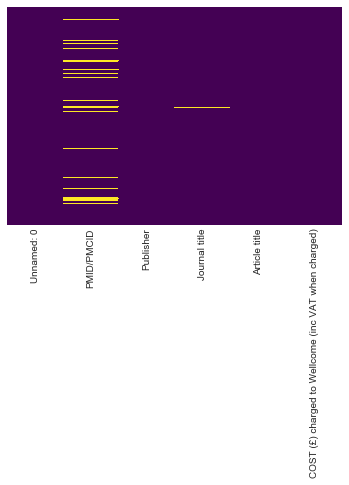

In [171]:
sns.heatmap(df_clean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Seaborn heatmap of the missing data in the data frame. 

In [172]:
df_clean['PMID/PMCID'].isnull().sum()


199

In [173]:
def standardize_text(df_clean, text_field):
    df_clean[text_field] = df_clean[text_field].str.lower()
    df_clean[text_field] = df_clean[text_field].str.replace(r'(', '') 
    df_clean[text_field] = df_clean[text_field].str.replace(r')', '')
    df_clean[text_field] = df_clean[text_field].str.replace(r',', '')
    df_clean[text_field] = df_clean[text_field].str.replace(r'_', '')
    df_clean[text_field] = df_clean[text_field].str.replace(r"'", "")
    df_clean[text_field] = df_clean[text_field].str.replace(r"^[a-z]+\[0-9]+$", "")
    df_clean[text_field] = df_clean[text_field].str.replace(r"^[0-9]{1,2,3,4,5}$", "")
return df_clean

,Unnamed: 0,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88
5,5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,£2392.20
6,6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,£2367.95
7,7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,£649.33
8,8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
9,9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,£1294.78


Cleaning the data removing separators, symbols, and other unwanted characters in the data frame. 

In [174]:

df1 = df_clean.rename(index=str, columns={"COST (£) charged to Wellcome (inc VAT when charged)": "Sterling"})

#df1.Sterling.str.replace('£','')

df1['sterling_£'] = df1['Sterling'].str.replace('£','')
df1['sterling_£'] = df1[['sterling_£']].convert_objects(convert_numeric=True)

df1['PMID/PMCID'] = df1[['PMID/PMCID']].convert_objects(convert_numeric=True)
df1['Publisher'] = df1[['Publisher']].convert_objects(convert_numeric=True)
df1['Journal title'] = df1[['Journal title']].convert_objects(convert_numeric=True)
df1['Article title'] = df1[['Article title']].convert_objects(convert_numeric=True)
df1['Sterling'] = df1[['Sterling']].convert_objects(convert_numeric=True)



df1.head()

C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  import sys
C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # Remove the CWD from sys.path while we load stuff.


,Unnamed: 0,PMID/PMCID,Publisher,Journal title,Article title,Sterling,sterling_£
0,0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00,0.00
1,1,NaN,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04,2381.04
2,2,NaN,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56,642.56
3,3,NaN,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64,669.64
4,4,NaN,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88,685.88


Removing the £ symbol and renaming the data frame. 

In this process we convert objects to numeric values. 

In [177]:
df1.dtypes


Unnamed: 0         int64
PMID/PMCID       float64
Publisher         object
Journal title     object
Article title     object
Sterling          object
sterling_£       float64
Journal_title     object
dtype: object

After the data frame is converted from object to numeric values. We can see the change sterling_£ (changed from object to float64). Now we can start looking at the central tendencies of the data frame. 

In [178]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2127 entries, 0 to 2126
Data columns (total 8 columns):
Unnamed: 0       2127 non-null int64
PMID/PMCID       297 non-null float64
Publisher        2127 non-null object
Journal title    2126 non-null object
Article title    2127 non-null object
Sterling         2127 non-null object
sterling_£       2114 non-null float64
Journal_title    2126 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 149.6+ KB


In [179]:
df1.describe()

,Unnamed: 0,PMID/PMCID,sterling_£
count,2127.000000,2.970000e+02,2114.000000
mean,1063.000000,1.048563e+07,24206.441892
std,614.156332,9.547628e+06,147300.992149
min,0.000000,4.157900e+04,0.000000
25%,531.500000,3.570299e+06,1280.000000
50%,1063.000000,3.724961e+06,1889.950000
75%,1594.500000,2.323976e+07,2322.315000
max,2126.000000,2.698811e+07,999999.000000


Determine the five most common journals and the total articles for each

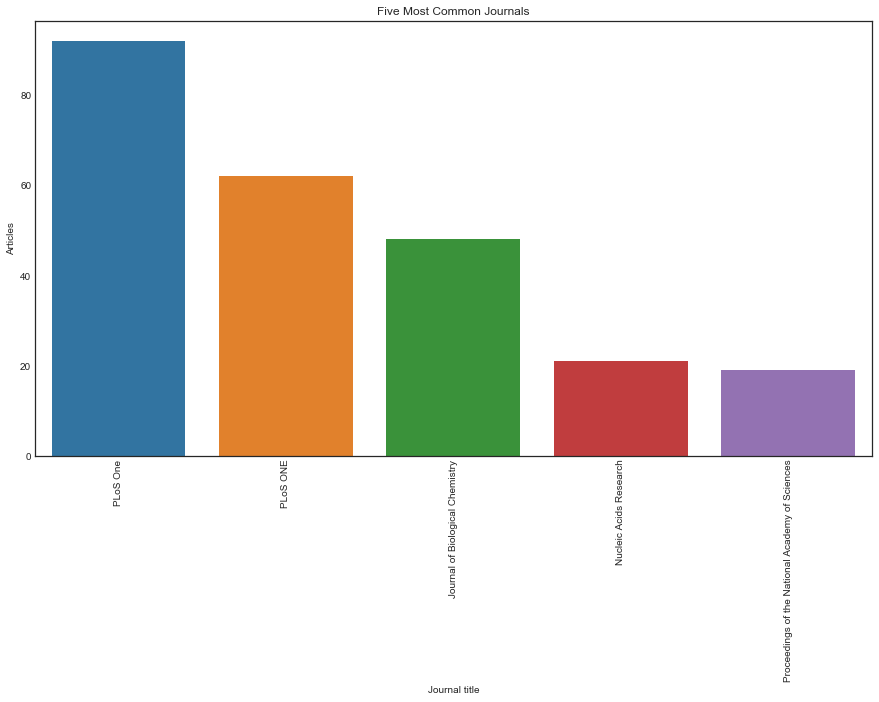

In [217]:
journal_title = df1[['Journal title','Article title']].groupby(['Journal title']).count()
journal_title = journal_title['Article title'].sort_values(ascending=False)[:5]

journal_title_keys = journal_title.index
journal_title_val = journal_title.values

fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(x = journal_title_keys,y = journal_title_val)

plt.title('Five Most Common Journals')
plt.ylabel('Articles')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

This is a figure of the top 5 Journal titles. The following analysis will be preformed on these 5 Journals. 

Calculate the mean, median, and standard deviation of the open-access cost per article for each journal 

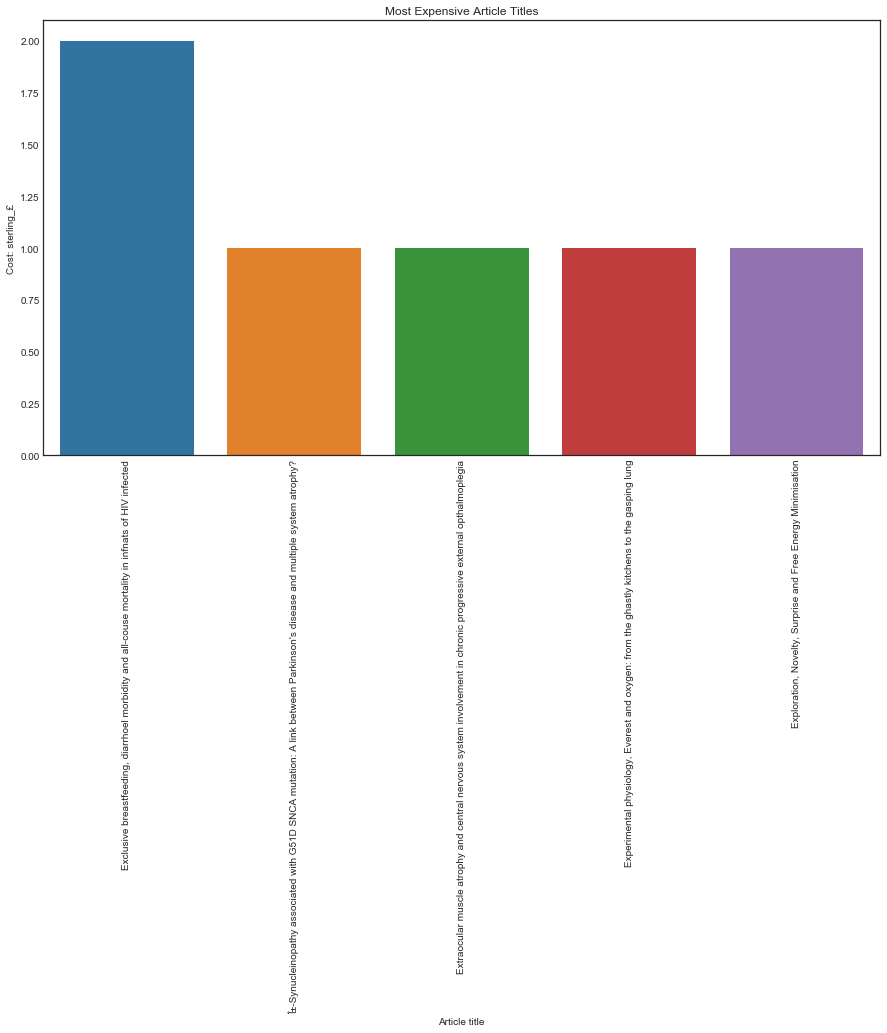

In [218]:
journal_title = df1[['Article title','sterling_£']].groupby(['Article title']).count()
journal_title = journal_title['sterling_£'].sort_values(ascending=False)[:5]

journal_title_keys = journal_title.index
journal_title_val = journal_title.values

fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(x = journal_title_keys,y = journal_title_val)

plt.title('Most Expensive Article Titles')
plt.ylabel('Cost: sterling_£')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

The figure above shows the top five most expensive article titles. 

In [219]:
aa = df1.groupby(['Journal title']).get_group('Proceedings of the National Academy of Sciences')


bb = aa.groupby(['Article title']).median()
bb

,Unnamed: 0,PMID/PMCID,sterling_£
Article title,,,
Analysis of Synthetic Lethality Reveals Genetic Interactions Between the GTPase Snu114p and snRNAs in the Catalytic Core of the Saccharomyces cerevisiae Spliceosome,429,2766312.0,1241.10
"CaBP1, a neuronal Ca2+ sensor protein, inhibits inositol trisphosphate receptors by clamping intersubunit interactions",1025,NaN,786.98
Increased lipolysis and altered lipid homeostatis protect y-synuclein-null mutant mice from diet induced obesity,1018,NaN,751.84
"Inositol kinase and its product accelerate wound healing by modulating calcium levels, Rho GTPases, and F-actin assembly",431,3704016.0,660.59
Interactions between the nucleosome histone core and Arp8 in the INO80 chromatin remodeling complex,1007,NaN,614.95
Multistep molecular mechanism for Bone morphogenetic protein extracellular transport in the Drosophila embryo,1311,3396515.0,206.32
Neonatal antibody responses are attenuated by interferon gamma produced by NK and T cells during RSV infection,1012,NaN,770.75
Prediction of economic choice by primate amygdala neurons,1023,NaN,732.25
Presynaptic maturation in auditory hair cells requires a critical period of sensory-independent spiking activity,1011,3666720.0,765.36


In [200]:
bb.describe()


,Unnamed: 0,PMID/PMCID,sterling_£
count,19.000000,5.000000e+00,19.000000
mean,952.526316,3.457155e+06,688.774737
std,250.442357,4.101399e+05,198.026428
min,429.000000,2.766312e+06,206.320000
25%,1006.500000,3.396515e+06,616.370000
50%,1011.000000,3.666720e+06,664.890000
75%,1020.500000,3.704016e+06,768.055000
max,1312.000000,3.752214e+06,1241.100000


Proceedings of the National Academy of Sciences: the mean, std, median are shown above. 

MEAN: 688.77
STD: 198.02


In [201]:
cc = df1.groupby(['Journal title']).get_group('Nucleic Acids Research')


dd = cc.groupby(['Article title']).mean()
dd

,Unnamed: 0,PMID/PMCID,sterling_£
Article title,,,
BuGSbase - a microbial gene expression and comparative genomic database,1245,NaN,1704.0
DNA cleavage by Type ISP Restriction-Modification enzymes is initially targeted to the 3'-5' strand,1152,3553963.0,852.0
"Functional interplay of DnaE polymerase, DnaG primase and DnaC helicase within a ternary complex, and primase to polymerase hand-off during lagging strand DNA replication in Bacillus subtilis.",1249,NaN,852.0
Genome3D: a UK collaborative project to annotate genomic sequences with predicted 3D structures based on SCOP and CATH domains,1248,NaN,852.0
Human SIRT1 regulates DNA-binding and stability of the Mcm10 DNA replication factor via deacetylation,1157,NaN,852.0
Identification and classification of bacterial Type III toxin-anti-toxin systems encoded in chromosomal and plasmid genomes,1251,NaN,852.0
Impact of Target Site Distribution for Type I Restriction Enzymes on the Evolution of Methicillin Resistant Staphylococcus aureus (MRSA) Populations,1149,NaN,2184.0
MBNL1 and PTB cooperate to repress splicing of Tpm1 exon 3,1250,NaN,852.0
New functional families (FunFams) in CATH to improve the mapping of conserved functional sites to 3D structures,1247,NaN,852.0


In [202]:
dd.describe()


,Unnamed: 0,PMID/PMCID,sterling_£
count,21.000000,6.000000e+00,21.000000
mean,1197.809524,3.559597e+06,1118.285714
std,48.276929,4.946199e+04,442.418031
min,1148.000000,3.467080e+06,852.000000
25%,1153.000000,3.553953e+06,852.000000
50%,1158.000000,3.573214e+06,852.000000
75%,1247.000000,3.592469e+06,1704.000000
max,1252.000000,3.597655e+06,2184.000000


Nucleic Acids Research: the mean, std, median are shown above. 

MEAN: 1118.28
STD: 442.41

In [203]:
ee = df1.groupby(['Journal title']).get_group('Journal of Biological Chemistry')


ff = ee.groupby(['Article title']).mean()
ff

,Unnamed: 0,PMID/PMCID,sterling_£
Article title,,,
?-Amino-3-hydroxy-5-methyl-4-isoxazole propionic acid (AMPA) and N-methyl-D-aspartate (NMDA) receptors adopt different subunit arrangements.,70,NaN,1166.85
Annexin-1 interaction with FPR2/ALX,16,22610094.0,265.67
Biophysical analysis of Kindlin-3 reveals an elongated conformation and maps integrin binding to the membrane-distal ?-subunit NPXY motif.,141,NaN,1610.31
Caspase inhibitors protect neurons by enabling selective necroptosis of inflamed microglia,74,NaN,1586.36
Cell Cycle-dependent Regulation of the Forkhead Transcription Factor FOXK2 by CDK·Cyclin Complexes,148,2975197.0,2344.79
"Characterisation of GAS2-like 3, a new microtubule and actin-binding protein related to spectraplakins",150,3137072.0,917.50
Comparative Proteomic Analysis of Supportive and Unsupportive Extracellular Matrix Substrates for Human Embryonic Stem Cell Maintenance.,129,3696646.0,1287.75
Contrasting Effects of a-synuclein and y-synuclein on the Phenotype of Cysteine String Protein alpha (CSPa) Null Mutant Mice Suggest Distinct Function of these Proteins in Neuronal Synapses,121,NaN,1134.50
Critical role for an acidic amino acid region in platelet signalling by the hemITAM (hemi-Immunoreceptor Tyrosine-based Activation Motif) containing receptor CLEC-2 (C-type Lectin receptor-2),341,NaN,1804.00


In [204]:
ff.describe()


,Unnamed: 0,PMID/PMCID,sterling_£
count,48.000000,1.200000e+01,48.000000
mean,115.208333,4.821953e+06,22233.865208
std,49.076128,5.608984e+06,144131.586569
min,16.000000,2.797226e+06,265.670000
25%,73.500000,2.969465e+06,1152.190000
50%,126.500000,3.185894e+06,1287.305000
75%,141.250000,3.476463e+06,1632.450000
max,341.000000,2.261009e+07,999999.000000


Journal of Biological Chemistry: mean, median, std

MEAN: 22233.86
STD: 144131.58
    

In [205]:
gg = df1.groupby(['Journal title']).get_group('PLoS ONE')


hh = gg.groupby(['Article title']).mean()
hh

,Unnamed: 0,PMID/PMCID,sterling_£
Article title,,,
"""Involvement of EphB1 receptors signalling in models of inflammatory and neuropathic pain"" PONE-D-12-21867",1287,NaN,1023.41
A Method for Positive and Negative Selection of Plasmodium falciparum Platelet-Mediated Clumping Parasites,1293,NaN,794.93
Analysis of human protein replacement stable cell lines established using snoMEN-PR vector,1536,NaN,878.72
Anti-Müllerian hormone is not associated with cardiometabolic risk factors in adolescent females,1292,3675909.0,1080.00
Assaying the effect of Levodopa on the evaluation of risk in healthy humans,1520,NaN,860.51
Associations of different phenotypes of wheezing illness in early childhood with environmental variables implicated in the aetiology of asthma,1286,3485223.0,1015.73
CHARACTERIZATION OF A NOVEL POPULATION OF LOW-DENSITY GRANULOCYTES ASSOCIATED WITH DISEASE SEVERITY,1554,NaN,896.96
"Changing use of surgical antibiotic prophylaxis in thika hospital, kenya: a quality improvement intervention with an interrupted time series design.",1505,NaN,843.72
Chronic pravastatin but not atorvastatin treatment impairs cognitive function in two rodent models of learning and memory,1289,3769269.0,1061.24


In [206]:
hh.describe()

,Unnamed: 0,PMID/PMCID,sterling_£
count,62.000000,1.000000e+01,62.000000
mean,1461.564516,3.625897e+06,49248.717258
std,105.220552,1.220381e+05,216138.486220
min,1282.000000,3.485223e+06,389.730000
25%,1417.250000,3.518884e+06,858.740000
50%,1513.500000,3.596596e+06,890.095000
75%,1535.500000,3.745929e+06,1021.490000
max,1579.000000,3.797097e+06,999999.000000


PLoS ONE: mean, median, and std

MEAN: 49248.71
STD: 216138.48


In [207]:
kk = df1.groupby(['Journal title']).get_group('PLoS One')


ll = kk.groupby(['Article title']).mean()
ll

,Unnamed: 0,PMID/PMCID,sterling_£
Article title,,,
"""The words will pass with the blowing wind""; staff and parent views of the deferred consent process, with prior assent, used in an emergency fluids trial in two African hospitals",1485,3569446.0,825.68
A Bovine Lymphosarcoma Cell Line Infected with Theileria annulata Exhibits an Irreversible Reconfiguration of Host Cell Gene Expression.,1540,23840536.0,886.18
A Modified RNA-Seq Approach for Whole Genome Sequencing of RNA Viruses from Faecal and Blood Samples,1547,NaN,887.31
"A Statistical Interaction between Circumsporozoite Protein-Specific T Cell and Antibody Responses and Risk of Clinical Malaria Episodes following Vaccination with RTS,S/AS01E.",1482,3531328.0,825.68
"A bead aggregation assay for detection of low-affinity protein-protein interactions reveals interactions between N-terminal domains of inosital 1,4,5-trisphosphate receptors",1444,NaN,1063.55
A cost effectiveness and capacity analysis for the introduction of universal rotavirus vaccination in Kenya: comparison between Rotarix and RotaTeq vaccines.,1478,3480384.0,825.68
"A prospective longitudinal study of the clinical outcomes from cryptococcal meningitis following treatment induction with 800mg oral fluconazole in Blantyre, Malawi",1447,NaN,1064.04
An activating mutation reveals a second binding mode of the integrin Î±2 I domain to the GFOGER motif in collagens,1459,NaN,1076.94
Anticipating the prevalence of avian influenza subtypes H9 and H5 in live-bird markets,1437,NaN,1047.25


In [208]:
ll.describe()

,Unnamed: 0,PMID/PMCID,sterling_£
count,91.000000,2.100000e+01,91.000000
mean,1483.120879,6.359260e+06,24995.559451
std,53.786788,6.952246e+06,148336.487817
min,1296.000000,3.480384e+06,122.310000
25%,1447.500000,3.543450e+06,825.680000
50%,1481.000000,3.574120e+06,896.320000
75%,1518.000000,3.726600e+06,1047.250000
max,1582.000000,2.396711e+07,999999.000000


PLoS One: mean, median, std

MEAN: 24995.55
STD: 148336.48



In [209]:
mm = df1.groupby(['Journal title']).get_group('Human Molecular Genetics')


nn = mm.groupby(['Article title']).mean()
nn

,Unnamed: 0,PMID/PMCID,sterling_£
Article title,,,
A genome-wide association study of early menopause and the combined impact of identified,1171,NaN,2040.00
ALS mutant FUS disrupts nuclear localisation and sequesters wild-type FUS within cytoplasmic stress granules,1270,NaN,2040.00
"Age-associated epigenetic drift: implications, and a case of epigenetic thrift?",1136,NaN,2100.00
Allelic heterogeneity and more detailed analyses of known loci explain additional phenotypic variation and reveal complex patterns of association,1170,NaN,2040.00
Altered 2-thiouridylation impairs mitochondrial translation in reversible infantile repiratory chain deficiency,1135,NaN,2100.00
Armet/Manf and Creld2 are components of a specialised ER stress response provoked by inappropriate,1134,NaN,2100.00
"Folliculin interacts with p0071 (plakophilin-4) and deficiency is associated with disordered RhoA signalling, epithelial polarization and cytokinesis",1137,NaN,2100.00
Genome Wide Meta-analysis points to CTC1 and ZNF676 as genes regulating telomere homeostasis in humans,1138,NaN,999999.00
Genome-Wide Association Study of Primary Tooth Eruption Identifies Pleiotropic Loci Associated With Height and Craniofacial Distances,1172,3749866.0,2100.00


In [210]:
nn.describe()

,Unnamed: 0,PMID/PMCID,sterling_£
count,18.000000,1.0,18.000000
mean,1187.333333,3749866.0,57483.208333
std,46.848944,NaN,235220.950188
min,1133.000000,3749866.0,1700.000000
25%,1137.250000,3749866.0,2040.000000
50%,1176.500000,3749866.0,2040.000000
75%,1221.500000,3749866.0,2100.000000
max,1270.000000,3749866.0,999999.000000


Human Molecular Genetics: mean, median, std

MEAN: 57483.20
STD: 235220.95

RESULTS:


1) Human Molecular Genetics: mean, median, std
MEAN: 57483.20 STD: 235220.95
---------------------------------
2) PLoS ONE: mean, median, and std
MEAN: 49248.71 STD: 216138.48
---------------------------------
3) PLoS One: mean, median, std
MEAN: 24995.55 STD: 148336.48
---------------------------------
4) Journal of Biological Chemistry: mean, median, std
MEAN: 22233.86 STD: 144131.58
---------------------------------
5) Nucleic Acids Research: the mean, std, median are shown above.
MEAN: 1118.28 STD: 442.41
---------------------------------
6) Proceedings of the National Academy of Sciences: the mean, std, median are shown above.
MEAN: 688.77 STD: 198.02